In [10]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [11]:
data = pd.read_csv("experiment.csv")
data.head()


,add,dot,prod,min,max,mean,density,n_cols,n_rows,format
0,0.0,0.152999,0.000,0.0,0.001000,0.0,1.0,10,10,full
1,0.0,0.000000,0.000,0.0,0.001000,0.0,1.0,10,10,full
2,0.0,0.000000,0.001,0.0,0.001000,0.0,1.0,10,10,full
3,0.0,0.000000,0.000,0.0,0.001000,0.0,1.0,10,10,full
4,0.0,0.000000,0.000,0.0,0.000999,0.0,1.0,10,10,full


In [12]:
data["elements"] = data["n_cols"] * data["n_rows"]
del(data["n_rows"])
del(data["n_cols"])

data.head()
print(data.head())

   add       dot   prod  min       max  mean  density format  elements
0  0.0  0.152999  0.000  0.0  0.001000   0.0      1.0   full       100
1  0.0  0.000000  0.000  0.0  0.001000   0.0      1.0   full       100
2  0.0  0.000000  0.001  0.0  0.001000   0.0      1.0   full       100
3  0.0  0.000000  0.000  0.0  0.001000   0.0      1.0   full       100
4  0.0  0.000000  0.000  0.0  0.000999   0.0      1.0   full       100


In [13]:
data["add"] = data["add"].clip(1e-6)
data["dot"] = data["dot"].clip(1e-6)
data["prod"] = data["prod"].clip(1e-6)
data["min"] = data["min"].clip(1e-6)
data["max"] = data["max"].clip(1e-6)
data["mean"] = data["mean"].clip(1e-6)


In [14]:
mat_data = data.copy()
del(mat_data["max"])
del(mat_data["min"])
mat_data.head()

,add,dot,prod,mean,density,format,elements
0,0.000001,0.152999,0.000001,0.000001,1.0,full,100
1,0.000001,0.000001,0.000001,0.000001,1.0,full,100
2,0.000001,0.000001,0.001000,0.000001,1.0,full,100
3,0.000001,0.000001,0.000001,0.000001,1.0,full,100
4,0.000001,0.000001,0.000001,0.000001,1.0,full,100


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


0.001    [[AxesSubplot(0.1,0.559091;0.363636x0.340909),...
0.010    [[AxesSubplot(0.1,0.559091;0.363636x0.340909),...
0.100    [[AxesSubplot(0.1,0.559091;0.363636x0.340909),...
1.000    [[AxesSubplot(0.1,0.559091;0.363636x0.340909),...
dtype: object

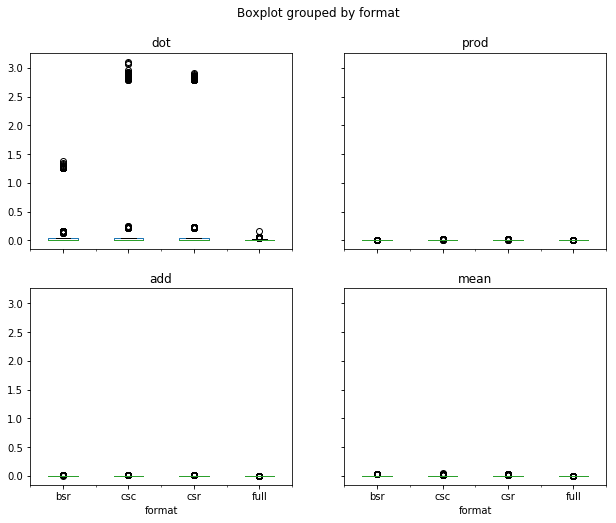

In [15]:
mat_data.groupby("density").boxplot(column=["dot","prod","add","mean"], by="format",figsize=(10,8), grid=False)


In [16]:
mean_data = mat_data.groupby(["density","elements","format"]).mean()
mean_data.reset_index(inplace=True)
mean_data.head(8)

,density,elements,format,add,dot,prod,mean
0,0.001,100,bsr,1.308300e-04,1.208800e-04,1.409000e-04,2.507700e-04
1,0.001,100,csc,1.907500e-04,2.503600e-04,2.008700e-04,3.001800e-04
2,0.001,100,csr,1.802200e-04,2.999300e-04,2.701800e-04,3.601400e-04
3,0.001,100,full,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
4,0.001,1000,bsr,1.757900e-04,1.253400e-04,1.705850e-04,3.009250e-04
5,0.001,1000,csc,1.510150e-04,2.304700e-04,1.712700e-04,2.657600e-04
6,0.001,1000,csr,1.762750e-04,2.355000e-04,2.107800e-04,2.612950e-04
7,0.001,1000,full,5.995000e-06,1.595500e-05,5.995000e-06,2.597500e-05


In [17]:
std_data = mat_data.groupby(["density","elements","format"]).std()
std_data.reset_index(inplace=True)
std_data.head(8)


,density,elements,format,add,dot,prod,mean
0,0.001,100,bsr,0.000338,0.000326,0.000348,0.000435
1,0.001,100,csc,0.000394,0.000434,0.000402,0.000459
2,0.001,100,csr,0.000384,0.000459,0.000445,0.000481
3,0.001,100,full,0.000000,0.000000,0.000000,0.000000
4,0.001,1000,bsr,0.000393,0.000330,0.000376,0.000459
5,0.001,1000,csc,0.000358,0.000421,0.000377,0.000442
6,0.001,1000,csr,0.000382,0.000424,0.000408,0.000440
7,0.001,1000,full,0.000071,0.000121,0.000071,0.000156


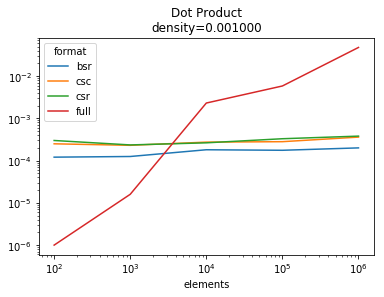

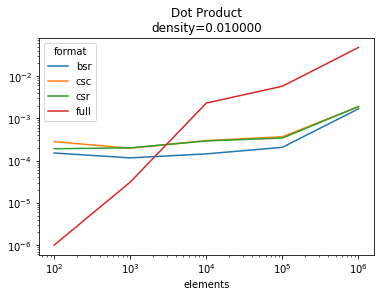

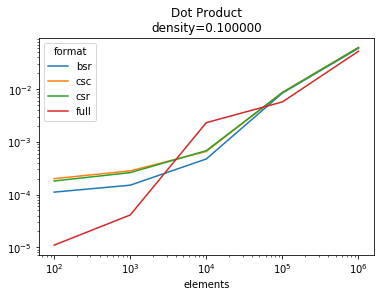

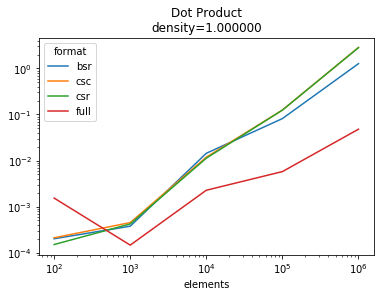

In [18]:
for density in mean_data["density"].drop_duplicates():
    temp_data = mean_data[mean_data["density"] == density]
    a = temp_data.pivot(index="elements", values = "dot", columns="format").plot(title="Dot Product\ndensity=%4f"%density)
    a.set_xscale("log")
    a.set_yscale("log")


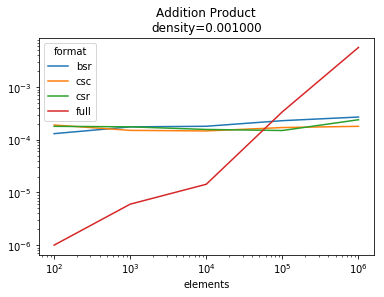

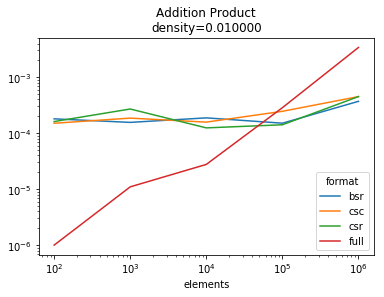

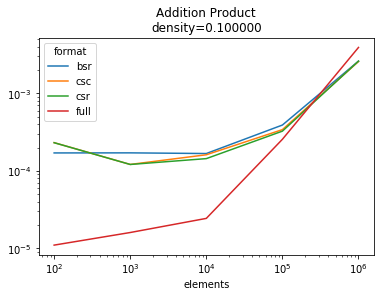

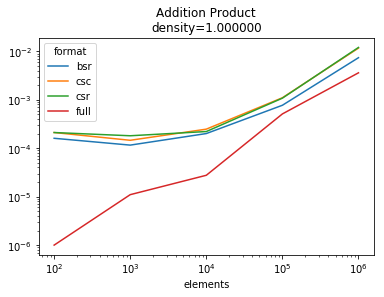

In [21]:
for density in mean_data["density"].drop_duplicates():
    temp_data= mean_data[mean_data["density"] == density]
    a = temp_data.pivot(index="elements", values = "add", columns="format").plot(title="Addition Product\ndensity=%4f"%density)
    a.set_xscale("log")
    a.set_yscale("log")

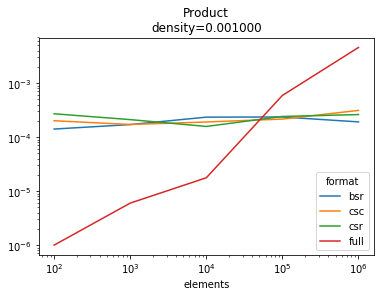

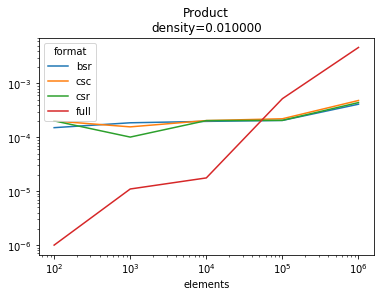

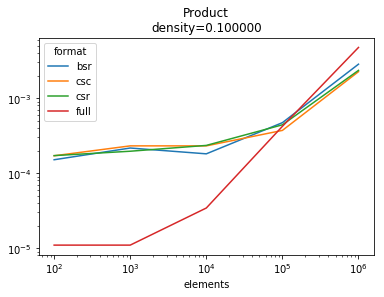

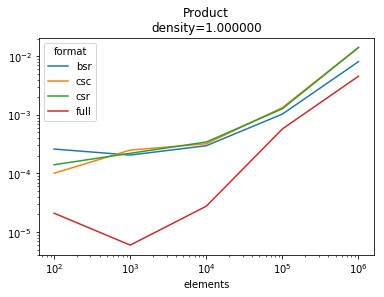

In [18]:
for density in mean_data["density"].drop_duplicates():
    temp_data = mean_data[mean_data["density"] == density]
    a = temp_data.pivot(index="elements", values = "prod", columns="format").plot(title="Product\ndensity=%4f"%density)
    a.set_xscale("log")
    a.set_yscale("log")


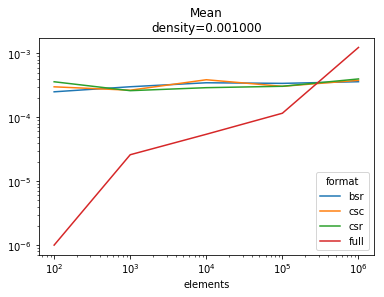

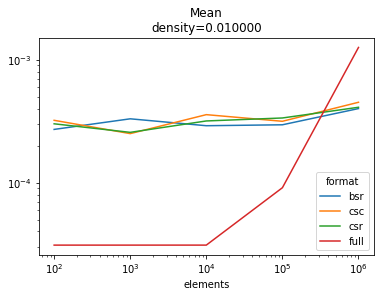

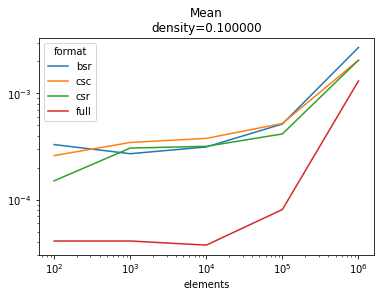

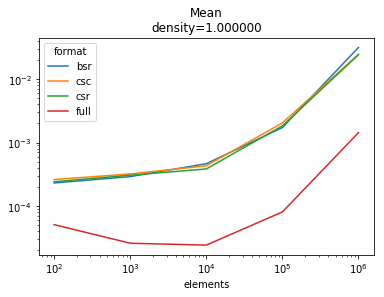

In [24]:
for density in mean_data["density"].drop_duplicates():
    temp_data = mean_data[mean_data["density"] == density]
    a = temp_data.pivot(index="elements", values = "mean", columns="format").plot(title="Mean\ndensity=%4f"%density)
    a.set_xscale("log")
    a.set_yscale("log")


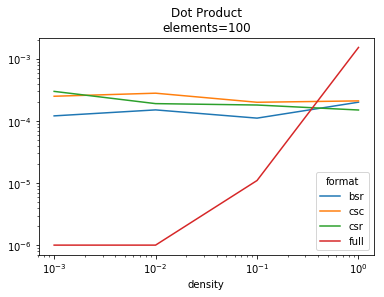

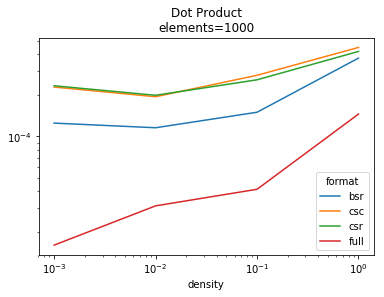

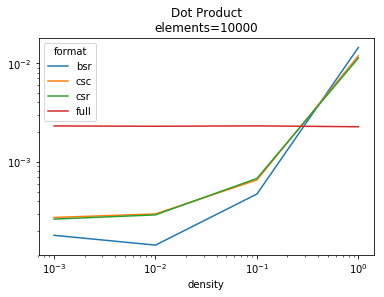

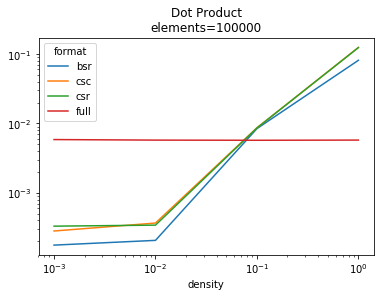

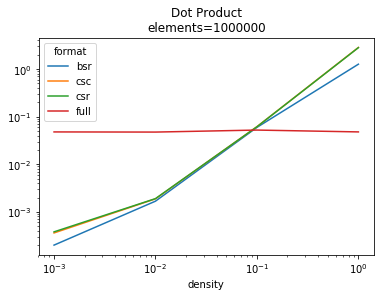

In [25]:
for elements in mean_data["elements"].drop_duplicates():
    temp_data = mean_data[mean_data["elements"] == elements]
    a = temp_data.pivot(index="density", values = "dot", columns="format").plot(title="Dot Product\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")

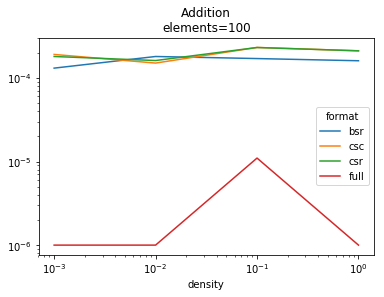

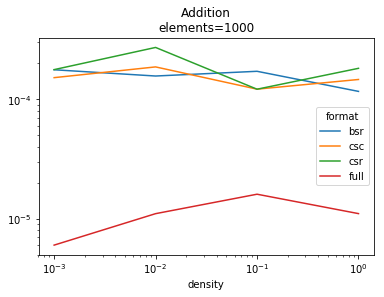

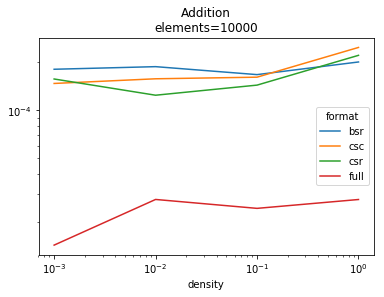

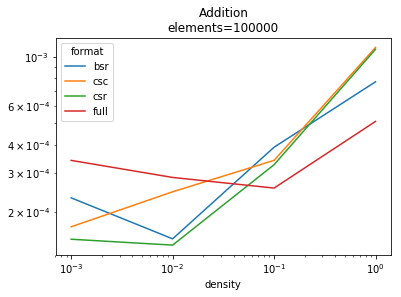

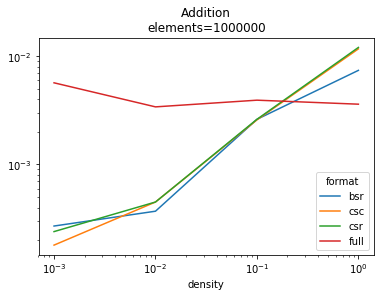

In [23]:
for elements in mean_data["elements"].drop_duplicates():
    temp_data = mean_data[mean_data["elements"] == elements]
    a = temp_data.pivot(index="density", values = "add", columns="format").plot(title="Addition\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")

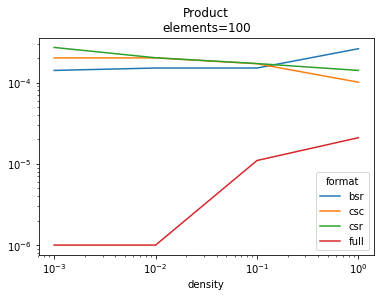

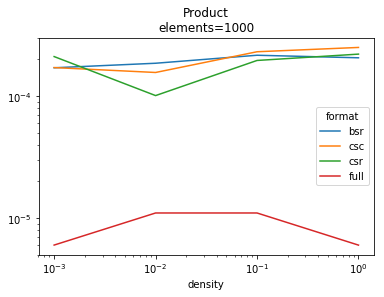

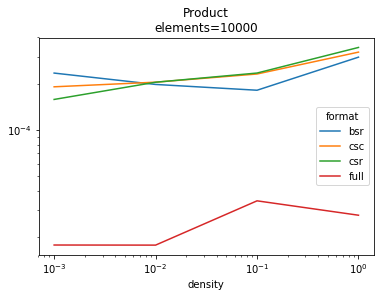

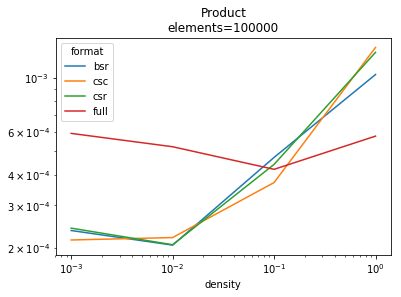

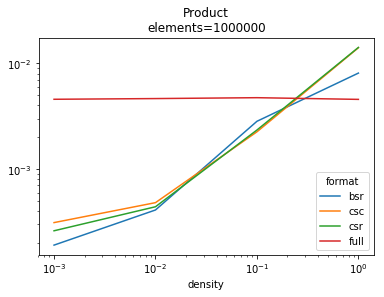

In [16]:
for elements in mean_data["elements"].drop_duplicates():
    temp_data = mean_data[mean_data["elements"] == elements]
    a = temp_data.pivot(index="density", values = "prod", columns="format").plot(title="Product\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")


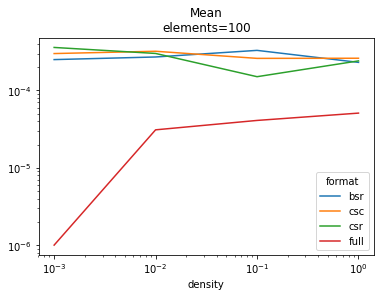

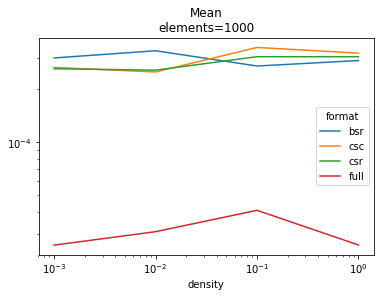

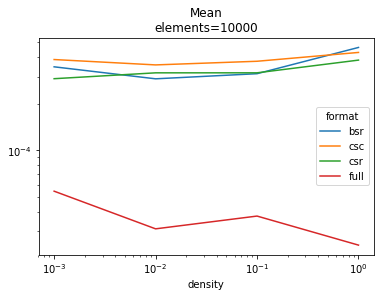

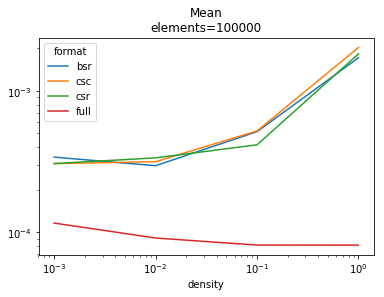

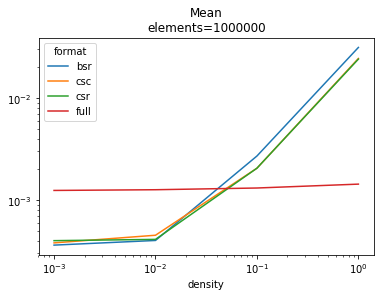

In [18]:
for elements in mean_data["elements"].drop_duplicates():
    temp_data = mean_data[mean_data["elements"] == elements]
    a = temp_data.pivot(index="density", values = "mean", columns="format").plot(title="Mean\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")


Min and Max exist for bsr, coo, csc, and csr


In [19]:
data_less = data.copy()
data_less = data_less[data_less["format"] != "dia"]
data_less = data_less[data_less["format"] != "lil"]
data_less = data_less[data_less["format"] != "dio"]

In [20]:
data_non_sparse = data[data["format"] == "full"]
data_bsr = data[data["format"] == "bsr"]
data_coo = data[data["format"] == "coo"]
data_csc = data[data["format"] == "csc"]
data_csr = data[data["format"] == "csr"]

In [21]:
def op_time_difference(data):
    in_data = data.copy()
    in_data["add"] = pd.Series((data_non_sparse["add"].values - in_data["add"])/data_non_sparse["add"].values)
    in_data["dot"] = pd.Series((data_non_sparse["dot"].values - in_data["dot"])/data_non_sparse["add"].values)
    in_data["prod"] = pd.Series((data_non_sparse["prod"].values - in_data["prod"])/data_non_sparse["add"].values)
    in_data["min"] = pd.Series((data_non_sparse["min"].values - in_data["min"])/data_non_sparse["add"].values)
    in_data["max"] = pd.Series((data_non_sparse["max"].values - in_data["max"])/data_non_sparse["add"].values)
    in_data["mean"] = pd.Series((data_non_sparse["mean"].values - in_data["mean"])/data_non_sparse["add"].values)
    return in_data

In [22]:
data_bsr = op_time_difference(data_bsr)
# data_coo = op_time_difference(data_coo)
data_csc = op_time_difference(data_csc)
data_csr = op_time_difference(data_csr)
print(data_bsr.head())

          add       dot    prod    min    max  mean  density format  elements
10800  -999.0  152998.0 -1000.0    0.0  999.0   0.0      1.0    bsr       100
10801 -1000.0       0.0     0.0    0.0  999.0   0.0      1.0    bsr       100
10802     0.0       0.0   999.0    0.0  999.0   0.0      1.0    bsr       100
10803     0.0       0.0     0.0    0.0  999.0   0.0      1.0    bsr       100
10804     0.0       0.0  -999.0 -999.0  998.0   0.0      1.0    bsr       100


In [23]:
data_gain = pd.concat([data_bsr,data_coo,data_csc,data_csr])
data_gain_grouped = data_gain.groupby(["density","elements","format"]).mean()
data_gain = data_gain_grouped.reset_index()

In [24]:
data_gain.head()


,density,elements,format,add,dot,prod,min,max,mean
0,0.001,100,bsr,-129.830000,-119.880000,-139.900000,-29.960,1048.980000,-249.770000
1,0.001,100,csc,-189.750000,-249.360000,-199.870000,-9.990,1058.980000,-299.180000
2,0.001,100,csr,-179.220000,-298.930000,-269.180000,0.000,1058.980000,-359.140000
3,0.001,1000,bsr,-174.785005,-109.385000,-164.590000,-39.925,894.014995,-269.959995
4,0.001,1000,csc,-150.010005,-209.784735,-160.025255,-29.960,933.984995,-239.785000


In [25]:
data_gain_grouped


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th>add</th>
      <th>dot</th>
      <th>prod</th>
      <th>min</th>
      <th>max</th>
      <th>mean</th>
    </tr>
    <tr>
      <th>density</th>
      <th>elements</th>
      <th>format</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="15" valign="top">0.001</th>
      <th rowspan="3" valign="top">100</th>
      <th>bsr</th>
      <td>-129.830000</td>
      <td>-119.880000</td>
      <td>-139.900000</td>
      <td>-29.960000</td>
      <td>1048.980000</td>
      <td>-249.770000</td>
    </tr>
    <tr>
      <th>csc</th>
      <td>-189.750000</td>
      <td>-249.360000</td>
      <td>-199.870000</td>
      <td>-9.990000</td>
      <td>1058.980000</td>
      <td>-299.180000</td>
    </tr>
    <tr>
      <th>csr</th>
      <td>-179.220000</td>
      <td>-298.930000</td>
      <td>-269.180000</td>
      <td>0.000000</td>
      <td>1058.980000</td>
      <td>-359.140000</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1000</th>
      <th>bsr</th>
      <td>-174.785005</td>
      <td>-109.385000</td>
      <td>-164.590000</td>
      <td>-39.925000</td>
      <td>894.014995</td>
      <td>-269.959995</td>
    </tr>
    <tr>
      <th>csc</th>
      <td>-150.010005</td>
      <td>-209.784735</td>
      <td>-160.025255</td>
      <td>-29.960000</td>
      <td>933.984995</td>
      <td>-239.785000</td>
    </tr>
    <tr>
      <th>csr</th>
      <td>-175.270005</td>
      <td>-214.554995</td>
      <td>-204.785000</td>
      <td>-35.395000</td>
      <td>928.989995</td>
      <td>-230.325000</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">10000</th>
      <th>bsr</th>
      <td>-179.760013</td>
      <td>2086.013327</td>
      <td>-216.403333</td>
      <td>-33.126663</td>
      <td>882.609987</td>
      <td>-286.489993</td>
    </tr>
    <tr>
      <th>csc</th>
      <td>-142.980007</td>
      <td>1996.033330</td>
      <td>-172.770000</td>
      <td>-36.636667</td>
      <td>902.559987</td>
      <td>-326.343327</td>
    </tr>
    <tr>
      <th>csr</th>
      <td>-156.080013</td>
      <td>2006.276660</td>
      <td>-139.823333</td>
      <td>-16.526667</td>
      <td>882.606653</td>
      <td>-226.739970</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">100000</th>
      <th>bsr</th>
      <td>-144.580356</td>
      <td>3426.861367</td>
      <td>229.904905</td>
      <td>34.939990</td>
      <td>784.674752</td>
      <td>-169.134950</td>
    </tr>
    <tr>
      <th>csc</th>
      <td>-114.590356</td>
      <td>3326.616467</td>
      <td>210.219866</td>
      <td>54.899985</td>
      <td>784.669766</td>
      <td>-144.814941</td>
    </tr>
    <tr>
      <th>csr</th>
      <td>-99.120070</td>
      <td>3337.326582</td>
      <td>224.569931</td>
      <td>64.909965</td>
      <td>774.674827</td>
      <td>-120.150075</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1000000</th>
      <th>bsr</th>
      <td>0.951801</td>
      <td>8.466373</td>
      <td>0.779254</td>
      <td>0.401660</td>
      <td>0.804083</td>
      <td>0.154030</td>
    </tr>
    <tr>
      <th>csc</th>
      <td>0.967617</td>
      <td>8.437738</td>
      <td>0.756196</td>
      <td>0.393869</td>
      <td>0.804342</td>
      <td>0.150975</td>
    </tr>
    <tr>
      <th>csr</th>
      <td>0.956952</td>
      <td>8.432772</td>
      <td>0.766587</td>
      <td>0.403389</td>
      <td>0.809758</td>
      <td>0.149024</td>
    </tr>
    <tr>
      <th rowspan="15" valign="top">0.010</th>
      <th rowspan="3" valign="top">100</th>
      <th>b

In [26]:
grouped_gain = data_gain.groupby(["density","elements","format"])
grouped_gain

In [27]:
data_gain_large_mat = data_gain[data_gain["elements"]>= 10000]
data_less_large_mat = data_less.groupby(["density","elements","format"],as_index=False).mean()
data_less_large_mat= data_less_large_mat[data_less_large_mat["elements"]>= 10000]


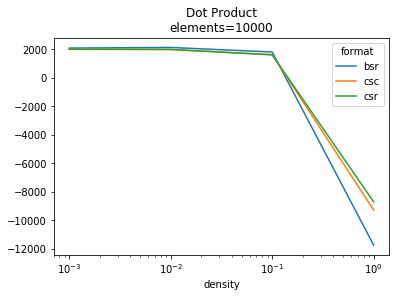

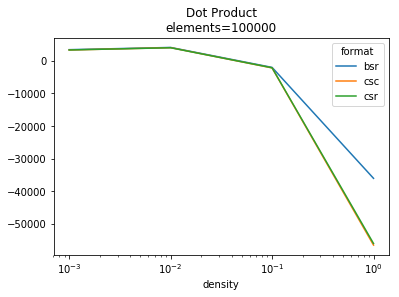

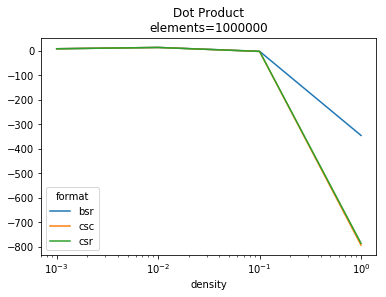

In [28]:
for elements in data_gain_large_mat["elements"].drop_duplicates():
    temp_data = data_gain_large_mat[data_gain_large_mat["elements"] == elements]
    a = temp_data.pivot(index="density", values = "dot", columns="format").plot(title="Dot Product\nelements=%i"%elements)
    a.set_xscale("log")
    # a.set_yscale("log")

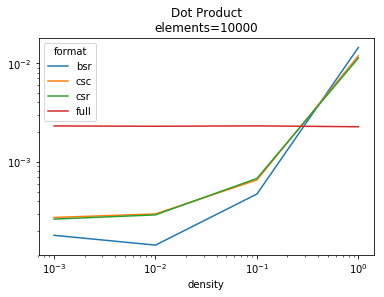

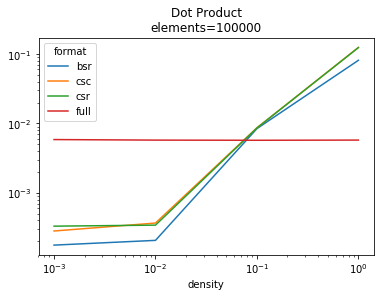

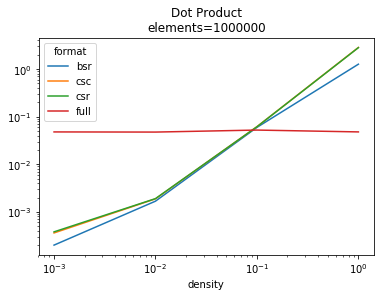

In [39]:
for elements in data_less_large_mat["elements"].drop_duplicates():
    temp_data = data_less_large_mat[data_less_large_mat["elements"] == elements]
    a = temp_data.pivot(index="density", values = "dot", columns="format").plot(title="Dot Product\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")

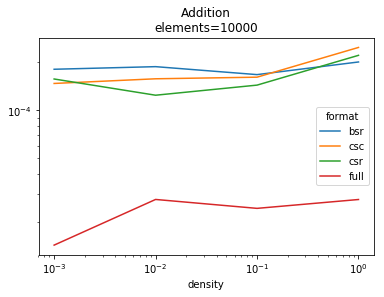

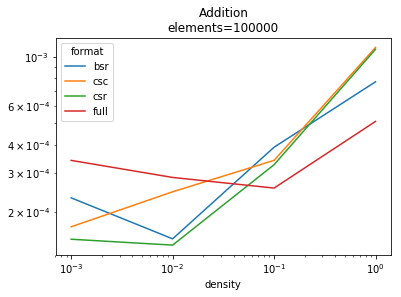

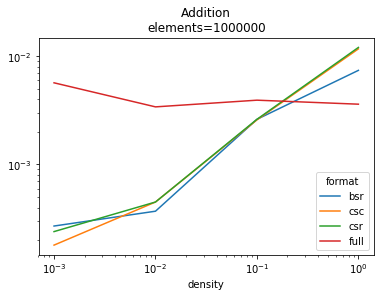

In [40]:
for elements in data_less_large_mat["elements"].drop_duplicates():
    temp_data = data_less_large_mat[data_less_large_mat["elements"] == elements]
    a = temp_data.pivot(index="density", values = "add", columns="format").plot(title="Addition\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")

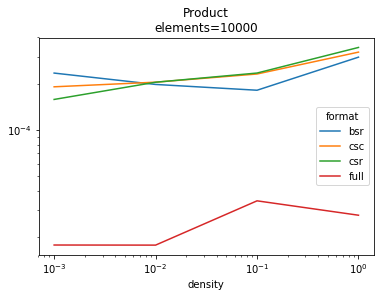

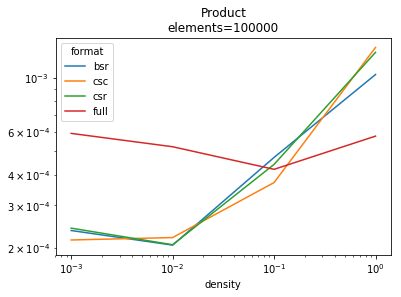

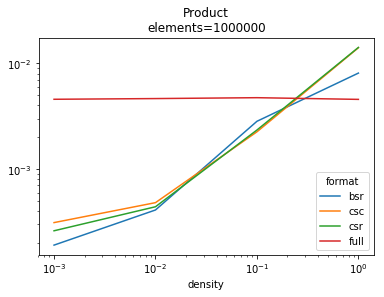

In [41]:
for elements in data_less_large_mat["elements"].drop_duplicates():
    temp_data = data_less_large_mat[data_less_large_mat["elements"] == elements]
    a = temp_data.pivot(index="density", values = "prod", columns="format").plot(title="Product\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")

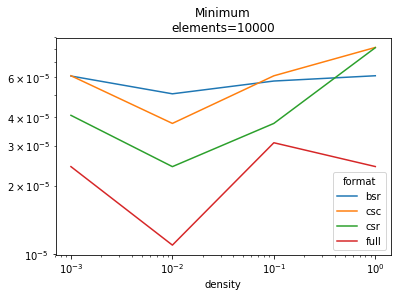

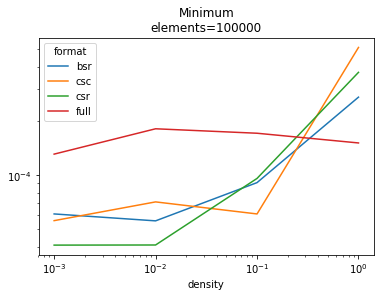

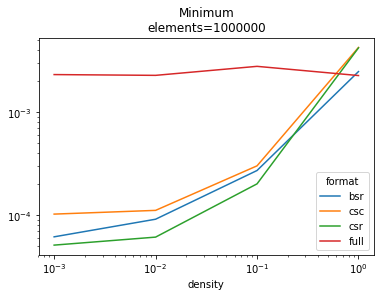

In [37]:
for elements in data_less_large_mat["elements"].drop_duplicates():
    temp_data = data_less_large_mat[data_less_large_mat["elements"] == elements]
    a = temp_data.pivot(index="density", values = "min", columns="format").plot(title="Minimum\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")

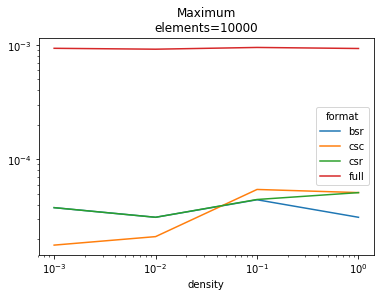

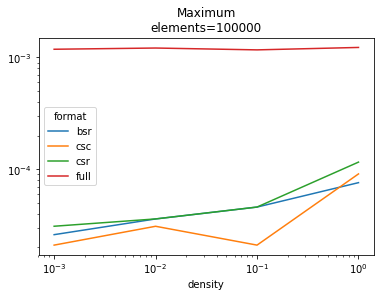

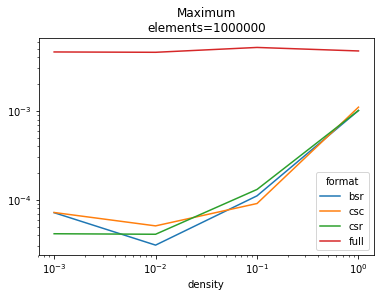

In [38]:
for elements in data_less_large_mat["elements"].drop_duplicates():
    temp_data = data_less_large_mat[data_less_large_mat["elements"] == elements]
    a = temp_data.pivot(index="density", values = "max", columns="format").plot(title="Maximum\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")

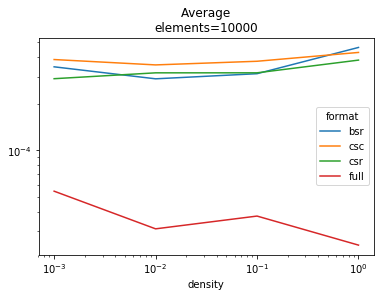

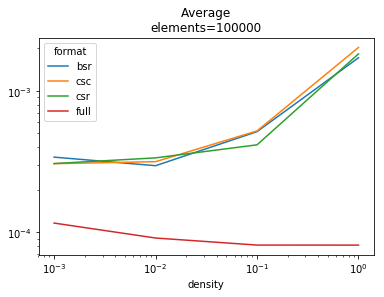

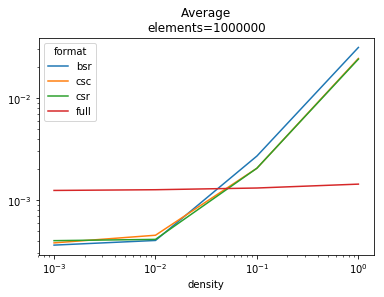

In [39]:
for elements in data_less_large_mat["elements"].drop_duplicates():
    temp_data = data_less_large_mat[data_less_large_mat["elements"] == elements]
    a = temp_data.pivot(index="density", values = "mean", columns="format").plot(title="Average\nelements=%i"%elements)
    a.set_xscale("log")
    a.set_yscale("log")

In [29]:
smaller_dataset = data_less_large_mat[(data_less["format"] == "csc") | (data_less["format"] == "full")]
smaller_dataset
csc_10k = smaller_dataset[((smaller_dataset["format"] == "csc") & (smaller_dataset["elements"] == 10000))]
csc_100k = smaller_dataset[((smaller_dataset["format"] == "csc") & (smaller_dataset["elements"] == 100000))]
csc_1m = smaller_dataset[((smaller_dataset["format"] == "csc") & (smaller_dataset["elements"] == 1000000))]
full_10k = smaller_dataset[((smaller_dataset["format"] == "full") & (smaller_dataset["elements"] == 10000))]
full_100k = smaller_dataset[((smaller_dataset["format"] == "full") & (smaller_dataset["elements"] == 100000))]
full_1m = smaller_dataset[((smaller_dataset["format"] == "full") & (smaller_dataset["elements"] == 1000000))]
csc_10k
csc_100k


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,density,elements,format,add,dot,prod,min,max,mean
13,0.001,100000,csc,0.000171,0.000281,0.000216,0.000056,0.000021,0.000306
33,0.010,100000,csc,0.000246,0.000366,0.000221,0.000071,0.000031,0.000316
53,0.100,100000,csc,0.000341,0.008659,0.000371,0.000061,0.000021,0.000521
73,1.000,100000,csc,0.001100,0.124778,0.001330,0.000511,0.000091,0.002035


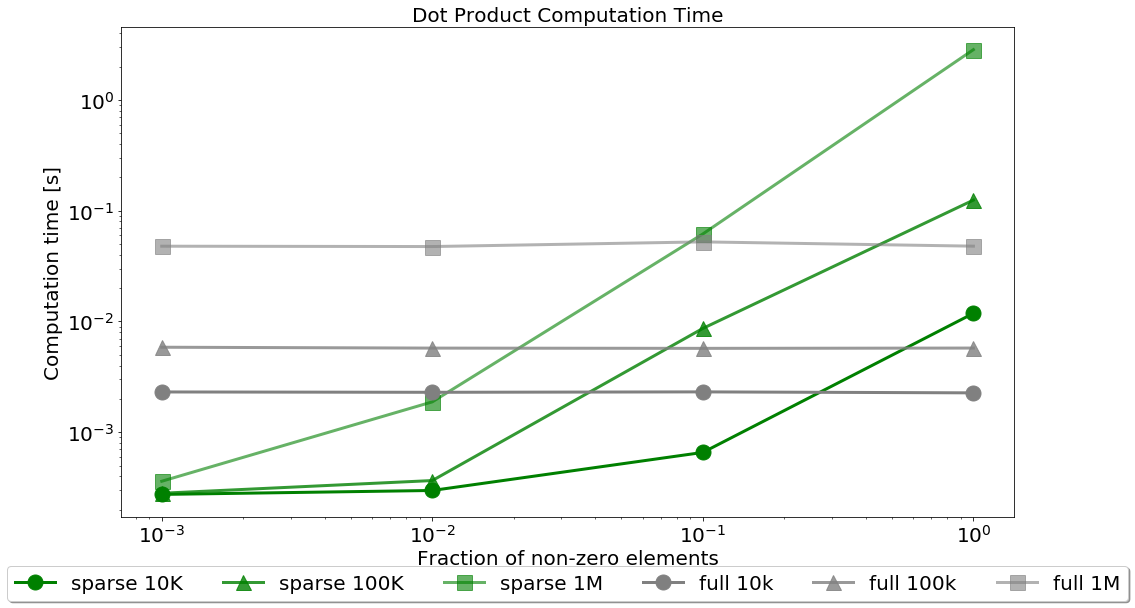

In [35]:
fig, ax = plt.subplots(1, 1,figsize = [16, 9]) 
line = 3
marker = 15
densities = csc_10k["density"].values
ax.plot(densities, csc_10k["dot"].values, "go-",label="sparse 10K", markersize=marker, linewidth=line, alpha=1)
ax.plot(densities, csc_100k["dot"].values, "g^-",label="sparse 100K", markersize=marker, linewidth=line, alpha=.8)
ax.plot(densities, csc_1m["dot"].values, "gs-",label="sparse 1M", markersize=marker, linewidth=line, alpha=.6)
ax.plot(densities, full_10k["dot"].values, "o-", color = "grey", label="full 10k", markersize=marker, linewidth=line, alpha=1)
ax.plot(densities, full_100k["dot"].values, "^-", color = "grey", label="full 100k", markersize=marker, linewidth=line, alpha=.8)
ax.plot(densities, full_1m["dot"].values, "s-", color = "grey",label="full 1M", markersize=marker, linewidth=line, alpha=.6)
ax.set_title("Dot Product Computation Time")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Computation time [s]")
ax.set_xlabel("Fraction of non-zero elements")
# fig.legend(bbox_to_anchor=(0.22, 0.8))
lgd = ax.legend(fontsize = 20,loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=6)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()
fig.savefig("sparse.jpg", bbox_extra_artists=(lgd,))
